In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [51]:
def draw_one(filename):
    fig = plt.figure(figsize=(24, 10))

    ax1, ax2 = fig.subplots(nrows=1, ncols=2)
    
    # TODO: get from filename
    n_shot, k_way = 5, 5 
    n_models = 3 
    
    data = pd.read_csv(os.path.join('maml_ens', filename))
    epochs = data['epoch']
    train_loss = data['loss']
    train_acc = data['categorical_accuracy']
    
    val_acc_str = f'val_{n_shot}-shot_{k_way}-way_acc'
    
    test_loss = data['val_loss']
    test_acc = data[val_acc_str]
    
    
    ax1.plot(epochs, train_loss, color='blue', label='train_loss')
    ax1.plot(epochs, test_loss, color='red', label='test_loss')
    
    for i in range(n_models):
        val_loss = data[f'val_loss_{i}']
        ax1.plot(epochs, val_loss, '--', alpha=0.4)
    
    ax1.legend()
    ax1.set_title('loss')

In [52]:
os.listdir('maml_ens/')

['mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=1_pred_mode=mean.csvhwr',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=1_pred_mode=logprobs.csvpqf',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=3_pred_mode=logprobs.csvxrt',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=1_pred_mode=mean.csvzuk',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=6_pred_mode=logprobs.csvdel',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=12_pred_mode=logprobs.csvwsr',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=6_pred_mode=mean.csvkum',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=3_pred_mode=mean.csvglo',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=12_pred_mode=mean.c

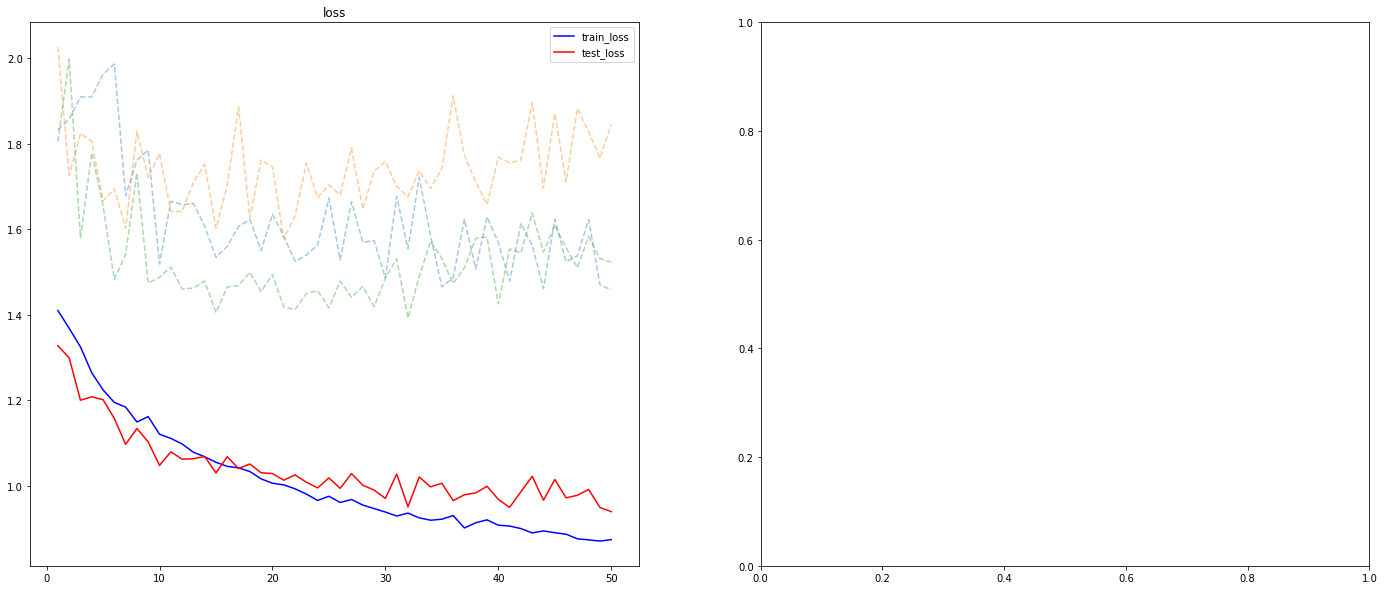

In [53]:
draw_one('mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=3_pred_mode=logprobs.csvxrt')

In [ ]:
def draw_accuracy(epochs, data, acc_range=None, name=None):
    x = np.arange(epochs)
    
    plt.figure(figsize=(12, 10))
    plt.title('accuracy' if name is None else 'acc ' + name)

    if acc_range is None:
        acc_range = np.arange(args.n_models)
    
    ens_name = f'val_{args.n}-shot_{args.k}-way_acc'
    solo_name = 'val_{}-shot_{}-way_acc_{}'
    
    plt.plot(x, data[ens_name], label='ens_result', color='blue')
    for i in acc_range:
        plt.plot(x, data[solo_name.format(args.n, args.k, i)], '--', 
                 alpha=0.4, label=f"{i+1} model's acc")
    
    plt.legend()
    plt.grid(ls=':')
    plt.show()
    
    
def draw_losses(epochs, data, acc_range=None, name=None):
    x = np.arange(epochs)
    
    plt.figure(figsize=(12, 10))
    plt.title('loss' if name is None else 'loss ' + name)

    if acc_range is None:
        acc_range = np.arange(args.n_models)
    
    ens_name = 'val_loss'
    solo_name = 'val_loss_{}'
    
    plt.plot(x, data[ens_name], label='ens_result', color='blue')
    for i in acc_range:
        plt.plot(x, data[solo_name.format(i)], '--', 
                 alpha=0.4, label=f"{i+1} model's loss")
    
    plt.legend()
    plt.grid(ls=':')
    plt.show()
